# Decision Trees & Random Forest: Visualization and Model Serving

This notebook demonstrates:
- **Tree Visualization**: Visualizing decision trees using sklearn's plot_tree, dtreeviz, and feature importance
- **Model Serving**: Comparing PICKLE vs ONNX for model serialization, creating REST API stubs, and latency testing

**Target Audience:** Beginners in Machine Learning

**Dataset:** Iris Flower Classification (predicting flower species based on petal and sepal measurements)


## Install Required Packages

Run the following cells to install all necessary packages for this notebook.


In [1]:
# Install core machine learning and visualization packages
# These are essential for the notebook
%pip install numpy pandas scikit-learn matplotlib seaborn -q
print("✓ Core packages installed (numpy, pandas, scikit-learn, matplotlib, seaborn)")



[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: /opt/homebrew/opt/python@3.11/bin/python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
✓ Core packages installed (numpy, pandas, scikit-learn, matplotlib, seaborn)


In [2]:
# Install dtreeviz for advanced tree visualization (optional but recommended)
%pip install dtreeviz -q
print("✓ dtreeviz installed")



[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: /opt/homebrew/opt/python@3.11/bin/python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
✓ dtreeviz installed


In [3]:
# Install ONNX packages for model serving (optional but recommended)
%pip install onnx onnxruntime skl2onnx -q
print("✓ ONNX packages installed (onnx, onnxruntime, skl2onnx)")



[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: /opt/homebrew/opt/python@3.11/bin/python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
✓ ONNX packages installed (onnx, onnxruntime, skl2onnx)


In [4]:
# Install Flask for REST API demonstration (optional)
%pip install flask -q
print("✓ Flask installed")



[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: /opt/homebrew/opt/python@3.11/bin/python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
✓ Flask installed


**Note:** If you encounter any installation errors, you can install packages individually or skip optional packages (dtreeviz, ONNX, Flask) - the notebook will work with just the core packages, though some features will be disabled.


## Part 1: Import Required Libraries

We'll use scikit-learn for machine learning models, visualization libraries for tree plotting, and serialization tools for model serving.


In [5]:
# Core libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for better-looking plots
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)


In [6]:
# Install dtreeviz if not already installed (uncomment if needed)
# !pip install dtreeviz

# Try importing dtreeviz (optional - will show alternative if not available)
try:
    from dtreeviz.trees import dtreeviz
    DTEVIZ_AVAILABLE = True
    print("✓ dtreeviz is available")
except ImportError:
    DTEVIZ_AVAILABLE = False
    print("⚠ dtreeviz not available. Install with: pip install dtreeviz")


⚠ dtreeviz not available. Install with: pip install dtreeviz


## Part 2: Load and Prepare the Dataset

We'll use the famous Iris dataset - a classic, simple dataset perfect for beginners. It contains measurements of iris flowers and their species.


In [7]:
# Load Iris dataset from sklearn (built-in dataset)
from sklearn.datasets import load_iris

# Load the dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target, name='species')

# Display basic information
print("Dataset shape:", X.shape)
print("\nFeature names:", iris.feature_names)
print("\nTarget classes:", iris.target_names)
print("\nFirst few rows:")
X.head()


Dataset shape: (150, 4)

Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

Target classes: ['setosa' 'versicolor' 'virginica']

First few rows:


sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

In [8]:
# Check class distribution
print("Class distribution:")
print(y.value_counts().sort_index())
print("\nClass names:")
for i, name in enumerate(iris.target_names):
    print(f"  {i}: {name}")


Class distribution:
species
0    50
1    50
2    50
Name: count, dtype: int64

Class names:
  0: setosa
  1: versicolor
  2: virginica


In [9]:
# Split data into training and testing sets
# 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")


Training set size: 120 samples
Test set size: 30 samples


## Part 3: Train Decision Tree Model

Let's train a simple decision tree classifier. We'll keep it simple with default parameters for now.


In [10]:
# Train a decision tree classifier
# max_depth=3 keeps the tree small and easy to visualize
dt_model = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions
y_pred = dt_model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))


Decision Tree Accuracy: 0.9667 (96.67%)

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.90      0.95        10
   virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



---

# Section 1: Tree Visualization

Now let's explore different ways to visualize our decision tree. Visualization helps us understand how the model makes decisions.


## 1.1: sklearn's plot_tree (Built-in Visualization)

The simplest way to visualize a decision tree is using sklearn's built-in `plot_tree` function. This is great for beginners because it requires no additional libraries.


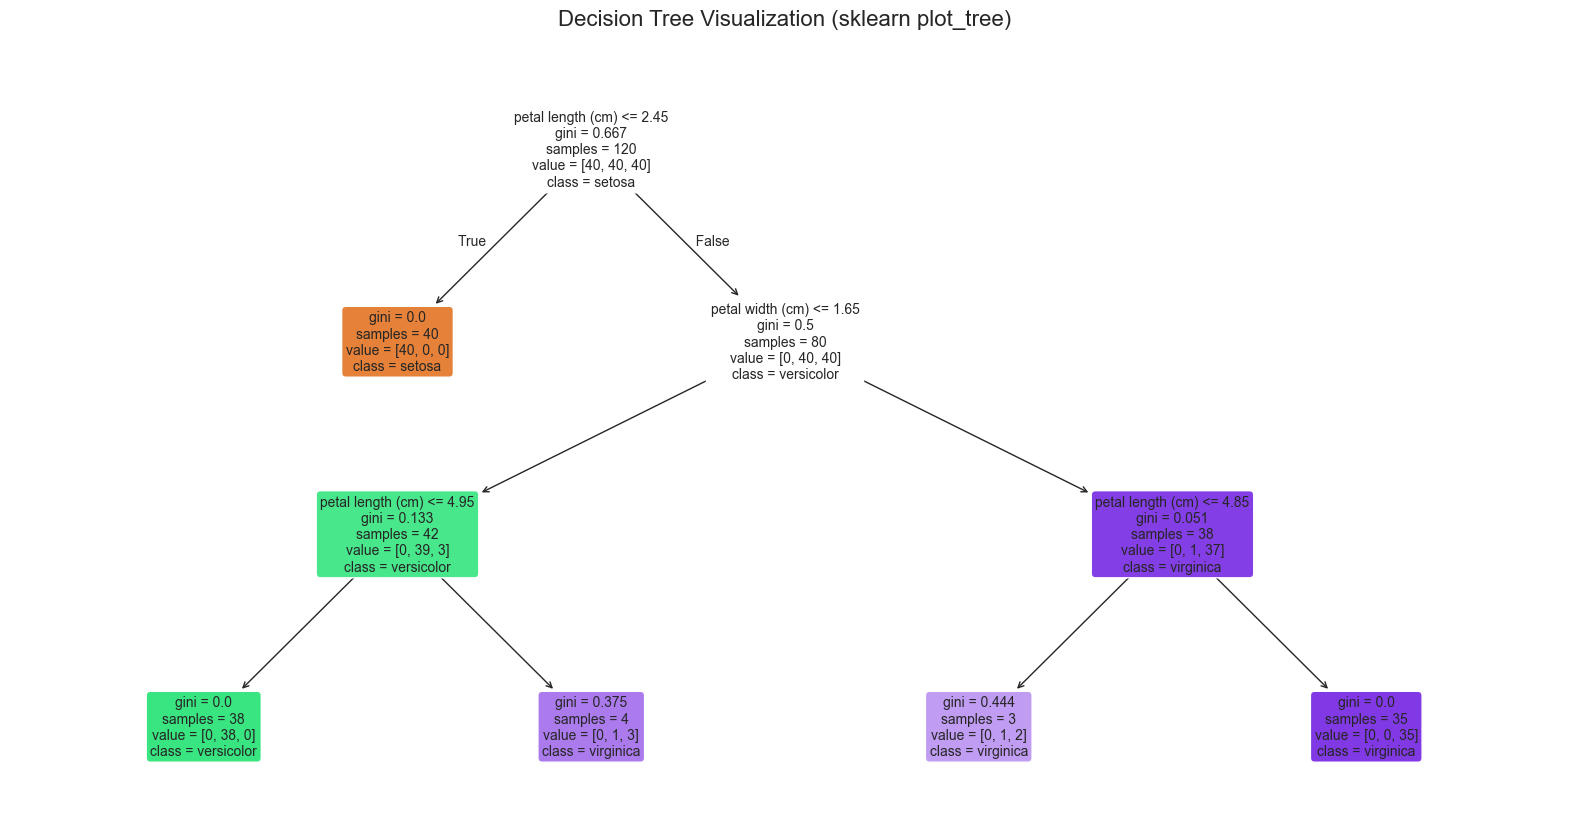

In [11]:
# Visualize the decision tree using sklearn's plot_tree
plt.figure(figsize=(20, 10))
plot_tree(dt_model, 
          feature_names=iris.feature_names,
          class_names=iris.target_names,
          filled=True,  # Color the nodes based on the majority class
          rounded=True,  # Round the corners of the boxes
          fontsize=10)
plt.title("Decision Tree Visualization (sklearn plot_tree)", fontsize=16, pad=20)
plt.show()

# Observation: This shows the complete tree structure with decision rules at each node


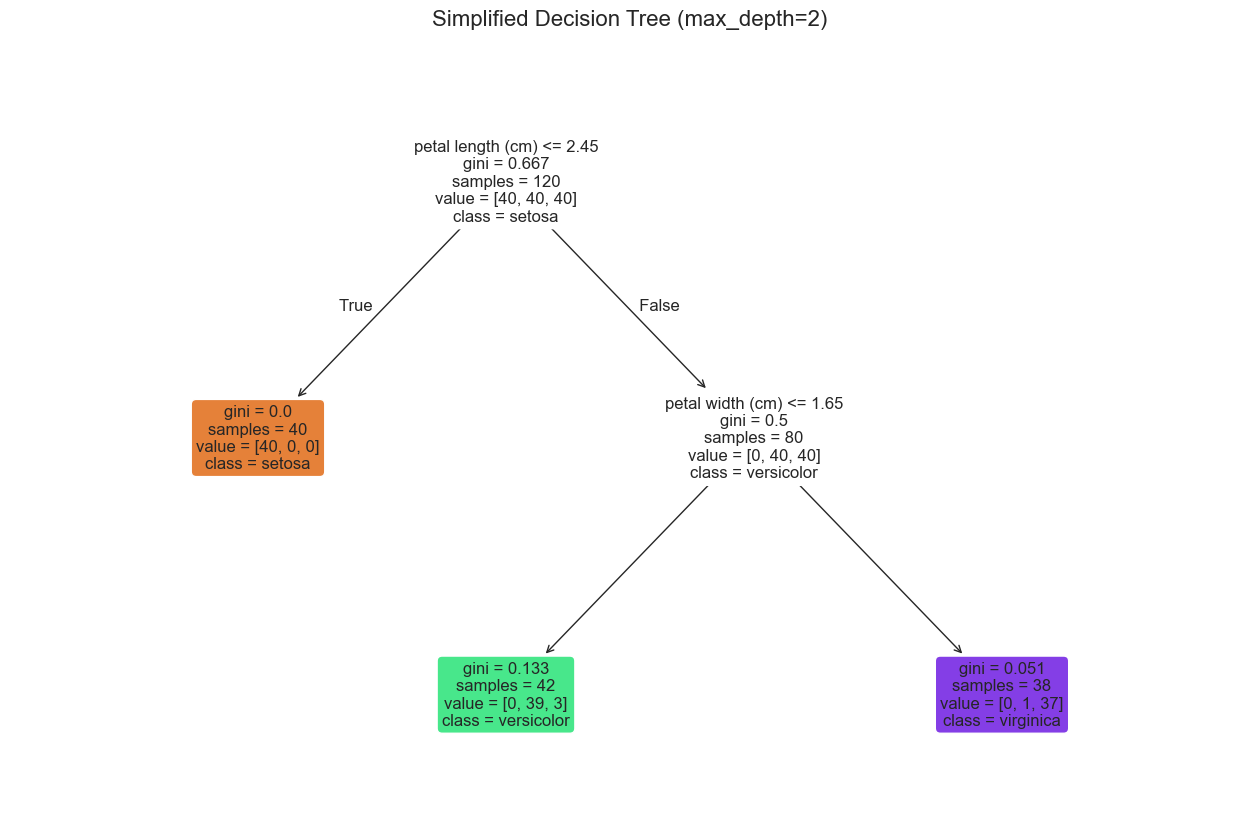


📝 Observation:
Each node shows:
  - The decision rule (e.g., 'petal width (cm) <= 0.8')
  - The gini impurity (measure of node purity)
  - Number of samples reaching that node
  - The class distribution [setosa, versicolor, virginica]
  - The predicted class (if it's a leaf node)


In [12]:
# Let's also create a smaller, more readable version
# We'll train a tree with max_depth=2 for clearer visualization
dt_small = DecisionTreeClassifier(max_depth=2, random_state=42)
dt_small.fit(X_train, y_train)

plt.figure(figsize=(16, 10))
plot_tree(dt_small,
          feature_names=iris.feature_names,
          class_names=iris.target_names,
          filled=True,
          rounded=True,
          fontsize=12)
plt.title("Simplified Decision Tree (max_depth=2)", fontsize=16, pad=20)
plt.show()

print("\n📝 Observation:")
print("Each node shows:")
print("  - The decision rule (e.g., 'petal width (cm) <= 0.8')")
print("  - The gini impurity (measure of node purity)")
print("  - Number of samples reaching that node")
print("  - The class distribution [setosa, versicolor, virginica]")
print("  - The predicted class (if it's a leaf node)")


## 1.2: dtreeviz (Advanced Visualization)

`dtreeviz` provides beautiful, publication-quality tree visualizations with more details. It shows feature distributions at each node, making it easier to understand the decision process.

**Note:** If dtreeviz is not installed, this section will be skipped. Install it with: `pip install dtreeviz`


In [13]:
if DTEVIZ_AVAILABLE:
    # Create a dtreeviz visualization
    # This shows feature distributions at each node
    viz = dtreeviz(dt_small,
                   X_train,
                   y_train,
                   target_name='species',
                   feature_names=iris.feature_names,
                   class_names=list(iris.target_names),
                   title="Decision Tree Visualization (dtreeviz)")
    viz.view()
    
    print("📝 Observation:")
    print("dtreeviz shows:")
    print("  - Histograms of feature distributions at each node")
    print("  - Clearer visual separation of classes")
    print("  - More intuitive understanding of decision boundaries")
else:
    print("⚠ dtreeviz not available. Using alternative visualization methods.")
    print("   Install with: pip install dtreeviz")


⚠ dtreeviz not available. Using alternative visualization methods.
   Install with: pip install dtreeviz


## 1.3: Feature Importance

Feature importance tells us which features are most important for making predictions. This is crucial for understanding your model and can help with feature selection.


In [14]:
# Get feature importance from the decision tree
feature_importance = pd.DataFrame({
    'feature': iris.feature_names,
    'importance': dt_model.feature_importances_
}).sort_values('importance', ascending=False)

print("Feature Importance Scores:")
print(feature_importance)
print("\n📝 Observation:")
print("Higher importance means the feature is used more often in decision-making.")
print("Features with 0 importance are not used in the tree at all.")


Feature Importance Scores:
             feature  importance
2  petal length (cm)    0.579077
3   petal width (cm)    0.420923
0  sepal length (cm)    0.000000
1   sepal width (cm)    0.000000

📝 Observation:
Higher importance means the feature is used more often in decision-making.
Features with 0 importance are not used in the tree at all.


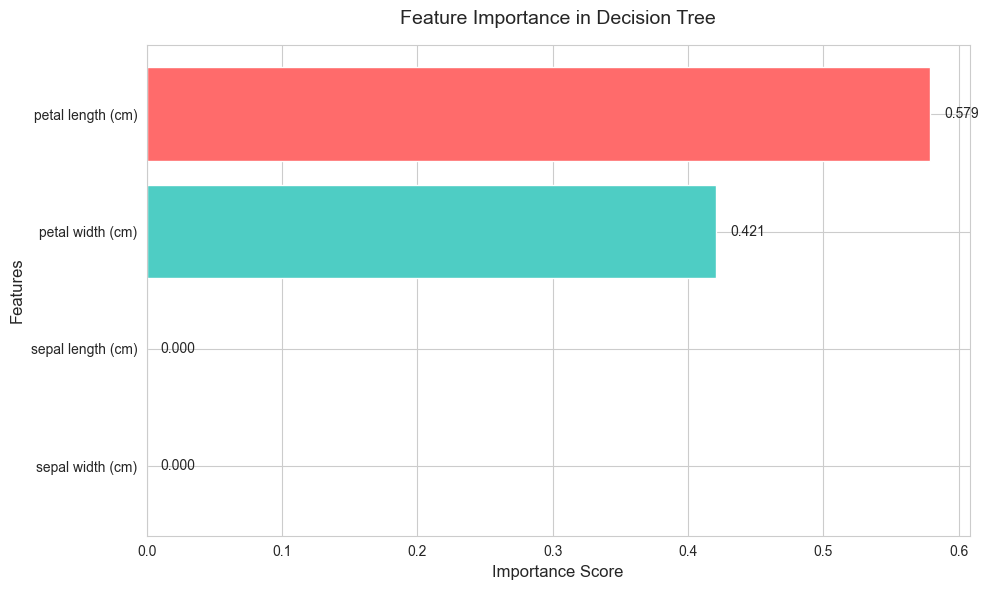


💡 Insight:
In the Iris dataset, petal measurements are typically more important
than sepal measurements for distinguishing between species.


In [15]:
# Visualize feature importance with a bar chart
plt.figure(figsize=(10, 6))
bars = plt.barh(feature_importance['feature'], feature_importance['importance'], 
                color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4'])
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.title('Feature Importance in Decision Tree', fontsize=14, pad=15)
plt.gca().invert_yaxis()  # Show highest importance at top

# Add value labels on bars
for i, (idx, row) in enumerate(feature_importance.iterrows()):
    plt.text(row['importance'] + 0.01, i, f"{row['importance']:.3f}", 
             va='center', fontsize=10)

plt.tight_layout()
plt.show()

print("\n💡 Insight:")
print("In the Iris dataset, petal measurements are typically more important")
print("than sepal measurements for distinguishing between species.")


## 1.4: Random Forest Feature Importance

Random Forest combines multiple decision trees. Let's see how feature importance compares.


In [16]:
# Train a Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate Random Forest
rf_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
print(f"Random Forest Accuracy: {rf_accuracy:.4f} ({rf_accuracy*100:.2f}%)")
print(f"Decision Tree Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")


Random Forest Accuracy: 0.9667 (96.67%)
Decision Tree Accuracy: 0.9667 (96.67%)


Random Forest Feature Importance:
             feature  importance
2  petal length (cm)    0.440338
3   petal width (cm)    0.439591
0  sepal length (cm)    0.114307
1   sepal width (cm)    0.005764


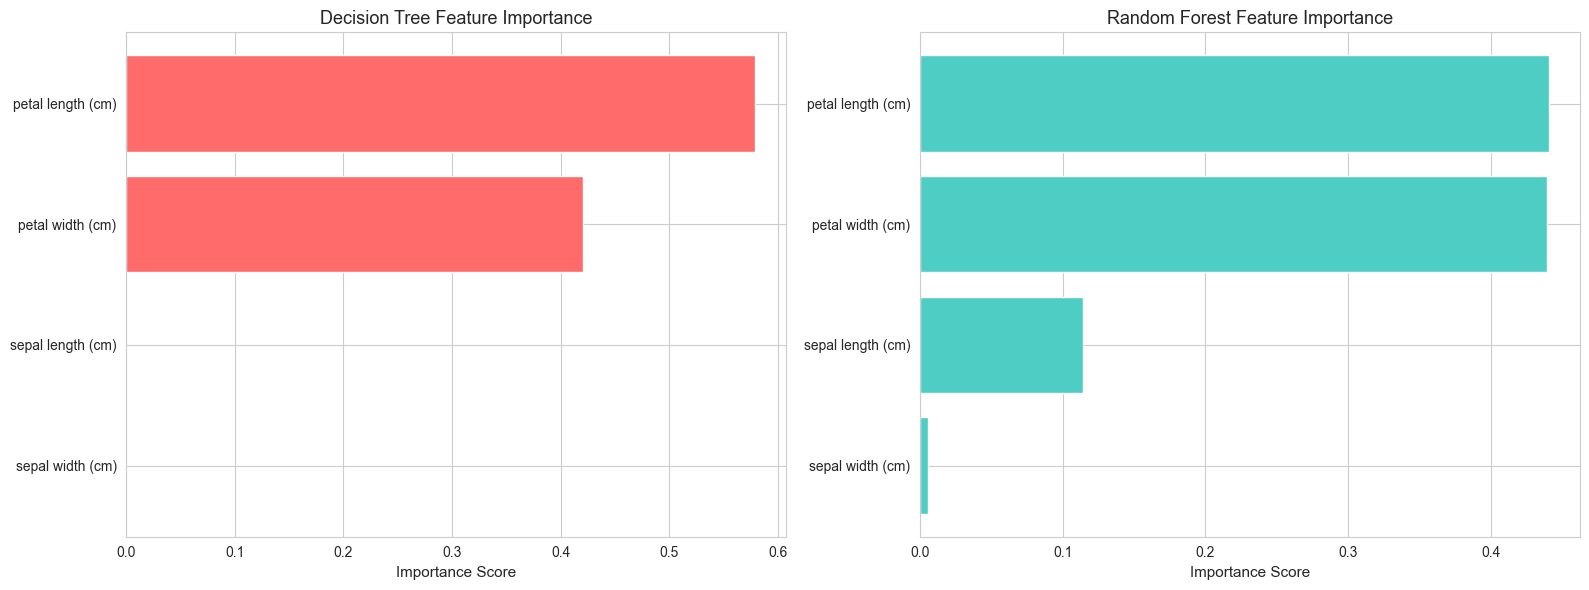


📝 Observation:
Random Forest averages feature importance across multiple trees,
making it more stable and reliable than a single decision tree.


In [17]:
# Compare feature importance between Decision Tree and Random Forest
rf_importance = pd.DataFrame({
    'feature': iris.feature_names,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print("Random Forest Feature Importance:")
print(rf_importance)

# Create comparison visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Decision Tree importance
ax1.barh(feature_importance['feature'], feature_importance['importance'], 
         color='#FF6B6B')
ax1.set_xlabel('Importance Score', fontsize=11)
ax1.set_title('Decision Tree Feature Importance', fontsize=13)
ax1.invert_yaxis()

# Random Forest importance
ax2.barh(rf_importance['feature'], rf_importance['importance'], 
         color='#4ECDC4')
ax2.set_xlabel('Importance Score', fontsize=11)
ax2.set_title('Random Forest Feature Importance', fontsize=13)
ax2.invert_yaxis()

plt.tight_layout()
plt.show()

print("\n📝 Observation:")
print("Random Forest averages feature importance across multiple trees,")
print("making it more stable and reliable than a single decision tree.")


---

# Section 2: Serving Tree Models

Once we've trained our model, we need to deploy it for production use. This section covers:
- **PICKLE**: Python's native serialization format (simple, Python-only)
- **ONNX**: Open Neural Network Exchange (cross-platform, optimized)
- **REST API**: Creating a simple API to serve predictions
- **Latency Testing**: Comparing performance of different serving methods


## 2.1: Model Serialization with PICKLE

PICKLE is Python's built-in serialization format. It's the simplest way to save and load models in Python.


In [18]:
import pickle
import os
import time

# Save model using PICKLE
pickle_file = 'dt_model.pkl'
with open(pickle_file, 'wb') as f:
    pickle.dump(dt_model, f)

# Check file size
file_size = os.path.getsize(pickle_file)
print(f"✓ Model saved to {pickle_file}")
print(f"  File size: {file_size:,} bytes ({file_size/1024:.2f} KB)")

# Load model from PICKLE
with open(pickle_file, 'rb') as f:
    loaded_model = pickle.load(f)

# Verify it works
test_pred = loaded_model.predict(X_test[:5])
print(f"\n✓ Model loaded successfully")
print(f"  Test prediction on first 5 samples: {test_pred}")
print(f"  Actual labels: {y_test.iloc[:5].values}")

print("\n📝 Observation:")
print("PICKLE is simple and works great for Python-only applications.")
print("However, it's not cross-platform and can be a security risk if loading untrusted files.")


✓ Model saved to dt_model.pkl
  File size: 2,104 bytes (2.05 KB)

✓ Model loaded successfully
  Test prediction on first 5 samples: [0 2 1 1 0]
  Actual labels: [0 2 1 1 0]

📝 Observation:
PICKLE is simple and works great for Python-only applications.
However, it's not cross-platform and can be a security risk if loading untrusted files.


## 2.2: Model Serialization with ONNX

ONNX (Open Neural Network Exchange) is a cross-platform format that allows models to run on different platforms and languages. It's optimized for production and can be faster than PICKLE.


In [19]:
# Install onnx and skl2onnx if needed (uncomment if required)
# !pip install onnx onnxruntime skl2onnx

try:
    from skl2onnx import convert_sklearn
    from skl2onnx.common.data_types import FloatTensorType
    import onnxruntime as ort
    ONNX_AVAILABLE = True
    print("✓ ONNX libraries are available")
except ImportError:
    ONNX_AVAILABLE = False
    print("⚠ ONNX not available. Install with: pip install onnx onnxruntime skl2onnx")


✓ ONNX libraries are available


In [20]:
if ONNX_AVAILABLE:
    # Convert sklearn model to ONNX format
    # Define input type (4 features, all floats)
    initial_type = [('float_input', FloatTensorType([None, 4]))]
    
    # Convert the model
    onnx_model = convert_sklearn(dt_model, initial_types=initial_type)
    
    # Save ONNX model
    onnx_file = 'dt_model.onnx'
    with open(onnx_file, 'wb') as f:
        f.write(onnx_model.SerializeToString())
    
    # Check file size
    onnx_size = os.path.getsize(onnx_file)
    print(f"✓ Model saved to {onnx_file}")
    print(f"  File size: {onnx_size:,} bytes ({onnx_size/1024:.2f} KB)")
    
    # Load and test ONNX model
    session = ort.InferenceSession(onnx_file)
    input_name = session.get_inputs()[0].name
    
    # Make prediction
    test_input = X_test[:5].values.astype(np.float32)
    onnx_pred = session.run(None, {input_name: test_input})[0]
    
    print(f"\n✓ ONNX model loaded successfully")
    print(f"  Test prediction on first 5 samples: {onnx_pred}")
    print(f"  Actual labels: {y_test.iloc[:5].values}")
    
    print("\n📝 Observation:")
    print("ONNX is cross-platform and can be used with C++, Java, C#, JavaScript, etc.")
    print("It's optimized for production and often faster than PICKLE.")
else:
    print("Skipping ONNX conversion (library not available)")


✓ Model saved to dt_model.onnx
  File size: 1,210 bytes (1.18 KB)

✓ ONNX model loaded successfully
  Test prediction on first 5 samples: [0 2 1 1 0]
  Actual labels: [0 2 1 1 0]

📝 Observation:
ONNX is cross-platform and can be used with C++, Java, C#, JavaScript, etc.
It's optimized for production and often faster than PICKLE.


## 2.3: Comparison: PICKLE vs ONNX

Let's compare file sizes and basic characteristics of both formats.


In [21]:
# Compare file sizes
comparison = pd.DataFrame({
    'Format': ['PICKLE', 'ONNX'],
    'File Size (KB)': [file_size/1024, onnx_size/1024 if ONNX_AVAILABLE else 0],
    'Platform': ['Python only', 'Cross-platform'],
    'Language Support': ['Python', 'Python, C++, Java, C#, JS, etc.']
})

print("Format Comparison:")
print(comparison.to_string(index=False))

print("\n📊 Summary:")
print("  • PICKLE: Simpler, Python-native, but platform-specific")
print("  • ONNX: More complex setup, but cross-platform and optimized")
print("  • Choose PICKLE for Python-only projects")
print("  • Choose ONNX for production systems needing cross-platform support")


Format Comparison:
Format  File Size (KB)       Platform                Language Support
PICKLE        2.054688    Python only                          Python
  ONNX        1.181641 Cross-platform Python, C++, Java, C#, JS, etc.

📊 Summary:
  • PICKLE: Simpler, Python-native, but platform-specific
  • ONNX: More complex setup, but cross-platform and optimized
  • Choose PICKLE for Python-only projects
  • Choose ONNX for production systems needing cross-platform support


## 2.4: Creating a REST API Stub

A REST API allows your model to be accessed over HTTP. This is the standard way to serve ML models in production. We'll create a simple Flask-based API stub.


In [22]:
# Install Flask if needed (uncomment if required)
# !pip install flask

try:
    from flask import Flask, request, jsonify
    FLASK_AVAILABLE = True
    print("✓ Flask is available")
except ImportError:
    FLASK_AVAILABLE = False
    print("⚠ Flask not available. Install with: pip install flask")


✓ Flask is available


In [23]:
# Create a simple REST API stub code
# This is a template that you would save as a separate .py file

rest_api_code = '''
from flask import Flask, request, jsonify
import pickle
import numpy as np

# Load the model
with open('dt_model.pkl', 'rb') as f:
    model = pickle.load(f)

app = Flask(__name__)

@app.route('/predict', methods=['POST'])
def predict():
    """
    Endpoint to make predictions
    Expects JSON with 'features' array
    Example: {"features": [[5.1, 3.5, 1.4, 0.2]]}
    """
    try:
        data = request.get_json()
        features = np.array(data['features'])
        
        # Make prediction
        predictions = model.predict(features)
        probabilities = model.predict_proba(features).tolist()
        
        # Map predictions to class names
        class_names = ['setosa', 'versicolor', 'virginica']
        results = []
        for pred, prob in zip(predictions, probabilities):
            results.append({
                'prediction': class_names[pred],
                'probabilities': {
                    class_names[i]: prob[i] for i in range(len(class_names))
                }
            })
        
        return jsonify({'results': results}), 200
    
    except Exception as e:
        return jsonify({'error': str(e)}), 400

@app.route('/health', methods=['GET'])
def health():
    """Health check endpoint"""
    return jsonify({'status': 'healthy'}), 200

if __name__ == '__main__':
    app.run(host='0.0.0.0', port=5000, debug=True)
'''

print("REST API Stub Code:")
print("=" * 60)
print(rest_api_code)
print("=" * 60)

print("\n📝 How to use:")
print("1. Save this code to a file named 'app.py'")
print("2. Make sure 'dt_model.pkl' is in the same directory")
print("3. Run: python app.py")
print("4. Test with: curl -X POST http://localhost:5000/predict \\")
print("              -H 'Content-Type: application/json' \\")
print("              -d '{\"features\": [[5.1, 3.5, 1.4, 0.2]]}'")


REST API Stub Code:

from flask import Flask, request, jsonify
import pickle
import numpy as np

# Load the model
with open('dt_model.pkl', 'rb') as f:
    model = pickle.load(f)

app = Flask(__name__)

@app.route('/predict', methods=['POST'])
def predict():
    """
    Endpoint to make predictions
    Expects JSON with 'features' array
    Example: {"features": [[5.1, 3.5, 1.4, 0.2]]}
    """
    try:
        data = request.get_json()
        features = np.array(data['features'])

        # Make prediction
        predictions = model.predict(features)
        probabilities = model.predict_proba(features).tolist()

        # Map predictions to class names
        class_names = ['setosa', 'versicolor', 'virginica']
        results = []
        for pred, prob in zip(predictions, probabilities):
            results.append({
                'prediction': class_names[pred],
                'probabilities': {
                    class_names[i]: prob[i] for i in range(len(class_names))
      

In [24]:
# Let's create a simple mock API test to demonstrate the concept
# (In real deployment, you'd run the Flask server separately)

class MockAPIServer:
    """Simple mock of a REST API server for demonstration"""
    def __init__(self, model):
        self.model = model
        self.class_names = ['setosa', 'versicolor', 'virginica']
    
    def predict(self, features):
        """Simulate API prediction endpoint"""
        features_array = np.array(features)
        predictions = self.model.predict(features_array)
        probabilities = self.model.predict_proba(features_array)
        
        results = []
        for pred, prob in zip(predictions, probabilities):
            results.append({
                'prediction': self.class_names[pred],
                'probabilities': {
                    self.class_names[i]: float(prob[i]) 
                    for i in range(len(self.class_names))
                }
            })
        return results

# Create mock server
mock_server = MockAPIServer(dt_model)

# Test with sample data
test_features = [[5.1, 3.5, 1.4, 0.2], [6.2, 3.4, 5.4, 2.3]]
result = mock_server.predict(test_features)

print("Mock API Response:")
import json
print(json.dumps(result, indent=2))

print("\n💡 In production:")
print("  • Use proper web frameworks (Flask, FastAPI, Django)")
print("  • Add authentication and rate limiting")
print("  • Use proper logging and error handling")
print("  • Deploy using containers (Docker) or cloud services")


Mock API Response:
[
  {
    "prediction": "setosa",
    "probabilities": {
      "setosa": 1.0,
      "versicolor": 0.0,
      "virginica": 0.0
    }
  },
  {
    "prediction": "virginica",
    "probabilities": {
      "setosa": 0.0,
      "versicolor": 0.0,
      "virginica": 1.0
    }
  }
]

💡 In production:
  • Use proper web frameworks (Flask, FastAPI, Django)
  • Add authentication and rate limiting
  • Use proper logging and error handling
  • Deploy using containers (Docker) or cloud services


/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names


## 2.5: Latency Testing

Latency is the time it takes to make a prediction. Lower latency means faster responses. Let's compare the latency of different serving methods.


In [25]:
# Function to measure prediction latency
def measure_latency(model, X_test_data, num_runs=1000):
    """Measure average prediction latency over multiple runs"""
    times = []
    
    for _ in range(num_runs):
        start = time.perf_counter()
        _ = model.predict(X_test_data)
        end = time.perf_counter()
        times.append((end - start) * 1000)  # Convert to milliseconds
    
    return {
        'mean': np.mean(times),
        'median': np.median(times),
        'std': np.std(times),
        'min': np.min(times),
        'max': np.max(times)
    }

# Test with in-memory model (baseline)
print("Testing in-memory model (baseline)...")
baseline_stats = measure_latency(dt_model, X_test.values)
print(f"  Mean latency: {baseline_stats['mean']:.4f} ms")
print(f"  Median latency: {baseline_stats['median']:.4f} ms")
print(f"  Std deviation: {baseline_stats['std']:.4f} ms")


Testing in-memory model (baseline)...
  Mean latency: 0.0367 ms
  Median latency: 0.0348 ms
  Std deviation: 0.0239 ms


/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: Use

In [26]:
# Test with PICKLE-loaded model
print("\nTesting PICKLE-loaded model...")
pickle_stats = measure_latency(loaded_model, X_test.values)
print(f"  Mean latency: {pickle_stats['mean']:.4f} ms")
print(f"  Median latency: {pickle_stats['median']:.4f} ms")
print(f"  Std deviation: {pickle_stats['std']:.4f} ms")



Testing PICKLE-loaded model...
  Mean latency: 0.1259 ms
  Median latency: 0.0344 ms
  Std deviation: 0.5902 ms


/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: Use

In [27]:
# Test with ONNX model (if available)
if ONNX_AVAILABLE:
    print("\nTesting ONNX model...")
    
    def onnx_predict(session, input_name, data):
        """Helper function for ONNX predictions"""
        return session.run(None, {input_name: data.astype(np.float32)})[0]
    
    onnx_times = []
    for _ in range(1000):
        start = time.perf_counter()
        _ = onnx_predict(session, input_name, X_test.values)
        end = time.perf_counter()
        onnx_times.append((end - start) * 1000)
    
    onnx_stats = {
        'mean': np.mean(onnx_times),
        'median': np.median(onnx_times),
        'std': np.std(onnx_times),
        'min': np.min(onnx_times),
        'max': np.max(onnx_times)
    }
    
    print(f"  Mean latency: {onnx_stats['mean']:.4f} ms")
    print(f"  Median latency: {onnx_stats['median']:.4f} ms")
    print(f"  Std deviation: {onnx_stats['std']:.4f} ms")
else:
    onnx_stats = None
    print("\n⚠ ONNX not available for latency testing")



Testing ONNX model...
  Mean latency: 0.0115 ms
  Median latency: 0.0092 ms
  Std deviation: 0.0160 ms



Latency Comparison (1000 predictions):
              Method  Mean Latency (ms)  Median Latency (ms)
In-Memory (Baseline)           0.036651             0.034791
              PICKLE           0.125945             0.034416
                ONNX           0.011508             0.009250


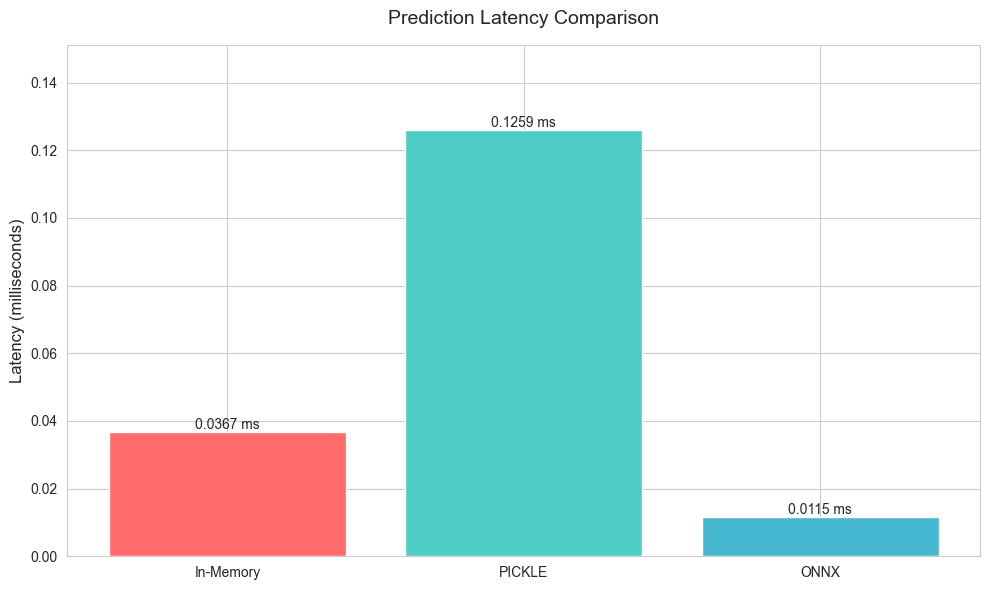


📝 Observations:
  • In-memory models are fastest (no serialization overhead)
  • PICKLE adds minimal overhead for loading, but predictions are similar
  • ONNX can be faster in production due to optimizations
  • For small models like this, differences are minimal
  • For larger models or high-throughput systems, ONNX shines


In [28]:
# Compare all methods
comparison_data = {
    'Method': ['In-Memory (Baseline)', 'PICKLE', 'ONNX' if ONNX_AVAILABLE else 'ONNX (N/A)'],
    'Mean Latency (ms)': [
        baseline_stats['mean'],
        pickle_stats['mean'],
        onnx_stats['mean'] if ONNX_AVAILABLE else 0
    ],
    'Median Latency (ms)': [
        baseline_stats['median'],
        pickle_stats['median'],
        onnx_stats['median'] if ONNX_AVAILABLE else 0
    ]
}

latency_df = pd.DataFrame(comparison_data)
print("\nLatency Comparison (1000 predictions):")
print(latency_df.to_string(index=False))

# Visualize latency comparison
if ONNX_AVAILABLE:
    methods = ['In-Memory', 'PICKLE', 'ONNX']
    mean_latencies = [baseline_stats['mean'], pickle_stats['mean'], onnx_stats['mean']]
else:
    methods = ['In-Memory', 'PICKLE']
    mean_latencies = [baseline_stats['mean'], pickle_stats['mean']]

plt.figure(figsize=(10, 6))
bars = plt.bar(methods, mean_latencies, color=['#FF6B6B', '#4ECDC4', '#45B7D1'][:len(methods)])
plt.ylabel('Latency (milliseconds)', fontsize=12)
plt.title('Prediction Latency Comparison', fontsize=14, pad=15)
plt.ylim(0, max(mean_latencies) * 1.2)

# Add value labels on bars
for bar, latency in zip(bars, mean_latencies):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{latency:.4f} ms',
             ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

print("\n📝 Observations:")
print("  • In-memory models are fastest (no serialization overhead)")
print("  • PICKLE adds minimal overhead for loading, but predictions are similar")
print("  • ONNX can be faster in production due to optimizations")
print("  • For small models like this, differences are minimal")
print("  • For larger models or high-throughput systems, ONNX shines")


In [29]:
# Test prediction throughput (predictions per second)
def measure_throughput(model, X_test_data, duration_seconds=1):
    """Measure how many predictions can be made per second"""
    start_time = time.perf_counter()
    count = 0
    
    while (time.perf_counter() - start_time) < duration_seconds:
        _ = model.predict(X_test_data)
        count += 1
    
    return count / duration_seconds

print("Throughput Testing (predictions per second):")
print(f"  In-memory model: {measure_throughput(dt_model, X_test.values):.0f} pred/s")
print(f"  PICKLE model: {measure_throughput(loaded_model, X_test.values):.0f} pred/s")

if ONNX_AVAILABLE:
    def onnx_throughput(session, input_name, data, duration_seconds=1):
        start_time = time.perf_counter()
        count = 0
        while (time.perf_counter() - start_time) < duration_seconds:
            _ = session.run(None, {input_name: data.astype(np.float32)})[0]
            count += 1
        return count / duration_seconds
    
    print(f"  ONNX model: {onnx_throughput(session, input_name, X_test.values):.0f} pred/s")

print("\n💡 Note: Throughput depends on model complexity and hardware.")
print("   For production, also consider batch prediction for better efficiency.")


Throughput Testing (predictions per second):


/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: Use

  In-memory model: 13236 pred/s


/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: Use

  PICKLE model: 14139 pred/s
  ONNX model: 114060 pred/s

💡 Note: Throughput depends on model complexity and hardware.
   For production, also consider batch prediction for better efficiency.


## Summary

### Tree Visualization
- **sklearn plot_tree**: Simple, built-in visualization - perfect for beginners
- **dtreeviz**: Advanced visualization with feature distributions - great for detailed analysis
- **Feature Importance**: Understand which features matter most for predictions

### Model Serving
- **PICKLE**: Simple Python serialization - use for Python-only projects
- **ONNX**: Cross-platform format - use for production systems needing multiple languages
- **REST API**: Standard way to serve models over HTTP
- **Latency**: Important metric for production - measure and optimize as needed

### Key Takeaways
1. Visualization helps understand how models make decisions
2. Feature importance guides feature selection and model interpretation
3. Choose serialization format based on your deployment needs
4. Always measure latency and throughput for production systems
5. REST APIs make models accessible to other applications